# Process log - Bias in DDS data?

Question: Is there evidence of discrimination in this dataset of state support to individuals with disabilities in the state of California?

See the conclusions at this link: https://docs.google.com/document/d/1IhVsOLIuNH9-aYdYCvDGEtvbTx1wiBfmvM6okJ_ik9Y/edit?usp=sharing

Process log outline:

- Exploratory work in each category is followed by an analysis heading
    - Age Cohort
        - Finding: Cohorts go from 0-5, 6-12,13-17,18-21,22-50,51+
            - Analysis 1: Age Cohort and Expenditure
                - Conclusion: As age cohort increases, so does expenditure
    - Age 
        - Finding: Nothing of note
            - Analysis 2: Age and Expenditure
                - Conclusion: Age and expenditure are correlated
    - Ethnicity
         - Finding: Whites and Hispanics comprise most of the dataset
    - Expenditure
         - Finding: mean is 18065, median 7026.0; we're dealing with skewed distributions, going to stick with median measures
            - Analysis 3: Ethnicity and Expenditure
                - Conclusion: Median expenditures among whites and Hispanics shows a disparity
            - Analysis 4: Ethnicity, Age and Expenditure
                - Conclusion: When you disaggregate the above trend by age cohort it disappears/reverses


In [ ]:
#import relevant libraries: pandas for analysis and pyplot for visualization

In [1]:
import pandas as pd
from matplotlib import pyplot

In [3]:
!ls

Bias.ipynb       dds_data (1).csv


# Open and explore

In [ ]:
#read in the data

In [4]:
df = pd.read_csv('dds_data (1).csv')

In [ ]:
#determine the fields and their datatypes

In [5]:
df.dtypes

ID               int64
Age_Cohort      object
Age              int64
Gender          object
Expenditures     int64
Ethnicity       object
dtype: object

In [ ]:
#determine how many entries we're workign with

In [6]:
df.describe

<bound method NDFrame.describe of        ID  Age_Cohort  Age  Gender  Expenditures           Ethnicity
0    10210      13-17   17  Female          2113  White not Hispanic
1    10409      22-50   37    Male         41924  White not Hispanic
2    10486      0 - 5    3    Male          1454            Hispanic
3    10538      18-21   19  Female          6400            Hispanic
4    10568      13-17   13    Male          4412  White not Hispanic
..     ...        ...  ...     ...           ...                 ...
995  99622       51 +   86  Female         57055  White not Hispanic
996  99715      18-21   20    Male          7494            Hispanic
997  99718      13-17   17  Female          3673          Multi Race
998  99791       6-12   10    Male          3638            Hispanic
999  99898      22-50   23    Male         26702  White not Hispanic

[1000 rows x 6 columns]>

# Age Cohort

In [ ]:
#look at the distribution of ages 

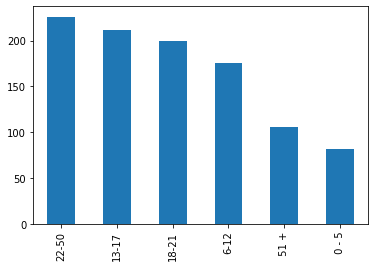

In [7]:
df.Age_Cohort.value_counts().plot(kind='bar')

In [ ]:
#mean

In [73]:
df.groupby(by='Age_Cohort').Expenditures.mean()

Age_Cohort
 0 - 5     1415.280488
 51 +     53521.896226
13-17      3922.613208
18-21      9888.537688
22-50     40209.283186
6-12       2226.862857
Name: Expenditures, dtype: float64

In [ ]:
#median

In [93]:
df.groupby(by='Age_Cohort').Expenditures.median()

Age_Cohort
 0 - 5     1380.5
 51 +     53509.0
13-17      3952.0
18-21      9979.0
22-50     40455.5
6-12       2191.0
Name: Expenditures, dtype: float64

In [ ]:
#median values are not that far off the mean ones, so I'm just going to use the mean ones to make this next point

# - Analysis 1: How does Age Cohort affect expenditure?

In [ ]:
#rearrange above data by age cohort in Visual Studio Code, save as dataframe

In [76]:
df2 = pd.read_csv('df2.csv')

In [ ]:
#plot

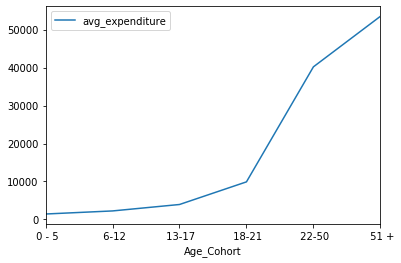

In [80]:
df2.plot(x='Age_Cohort',y='avg_expenditure')

In [ ]:
#Increase in age chort, increase in avg expenditure 

# Age

In [ ]:
#quick look at values

In [138]:
df.Age.value_counts()

20    54
16    50
18    50
19    48
21    47
      ..
67     1
55     1
48     1
46     1
77     1
Name: Age, Length: 86, dtype: int64

# - Analysis 2: How does Age affect Expenditure?

In [143]:
#scatterplot of age v expenditure — why does it jump like that? investigate

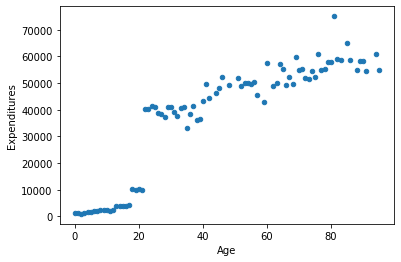

In [134]:
df.groupby(by='Age')['Expenditures'].median().reset_index().plot(kind='scatter', x='Age', y='Expenditures')

In [ ]:
#age and expenditure are correlated

In [135]:
df['Age'].corr(df['Expenditures'], method='pearson')

0.8432421766697423

# Race / Ethnicity

In [ ]:
#looking at percentage composition

In [130]:
df.Ethnicity.value_counts(normalize=True)

White not Hispanic    0.401
Hispanic              0.376
Asian                 0.129
Black                 0.059
Multi Race            0.026
American Indian       0.004
Native Hawaiian       0.003
Other                 0.002
Name: Ethnicity, dtype: float64

In [136]:
#visualizing number of entries by race

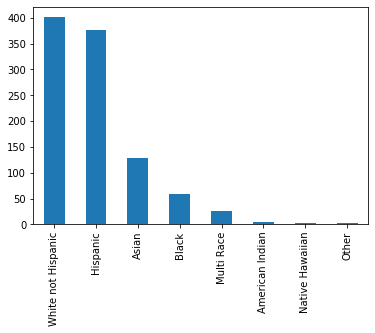

In [10]:
df.Ethnicity.value_counts().plot(kind='bar')

# Exploring expenditures

In [144]:
#some basic central tendency measure, looking at skew

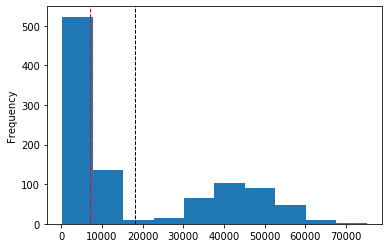

In [11]:
plt = df.Expenditures.plot(kind='hist')
plt.axvline(df.Expenditures.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df.Expenditures.median(), color='red', linestyle='dashed', linewidth=1)



In [ ]:
#mean

In [12]:
df.Expenditures.mean()

18065.786

In [ ]:
#median

In [13]:
df.Expenditures.median()

7026.0

# - Analysis 3: How does Ethnicity affect Expenditure? 

White

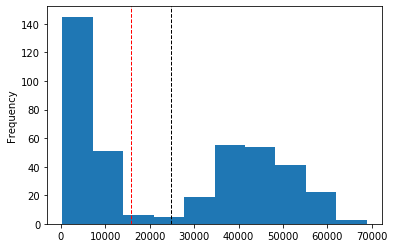

In [15]:
plt = df[df['Ethnicity']=='White not Hispanic'].Expenditures.plot(kind='hist')
plt.axvline(df[df['Ethnicity']=='White not Hispanic'].Expenditures.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df[df['Ethnicity']=='White not Hispanic'].Expenditures.median(), color='red', linestyle='dashed', linewidth=1)




Black

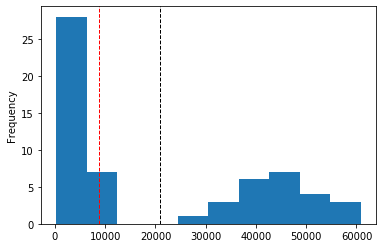

In [17]:
plt = df[df['Ethnicity']=='Black'].Expenditures.plot(kind='hist')
plt.axvline(df[df['Ethnicity']=='Black'].Expenditures.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df[df['Ethnicity']=='Black'].Expenditures.median(), color='red', linestyle='dashed', linewidth=1)





Hispanic

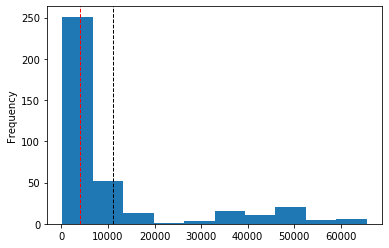

In [19]:
plt = df[df['Ethnicity']=='Hispanic'].Expenditures.plot(kind='hist')
plt.axvline(df[df['Ethnicity']=='Hispanic'].Expenditures.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df[df['Ethnicity']=='Hispanic'].Expenditures.median(), color='red', linestyle='dashed', linewidth=1)






Asian

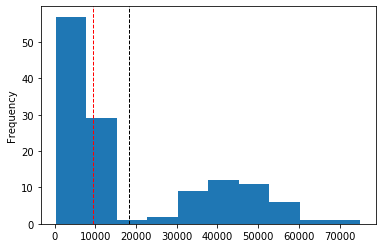

In [20]:
plt = df[df['Ethnicity']=='Asian'].Expenditures.plot(kind='hist')
plt.axvline(df[df['Ethnicity']=='Asian'].Expenditures.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df[df['Ethnicity']=='Asian'].Expenditures.median(), color='red', linestyle='dashed', linewidth=1)







In [21]:
#seems that white and hispanic are comparable, so let's compare them

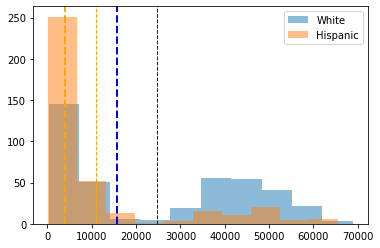

In [22]:
pyplot.hist(df[df['Ethnicity']=='White not Hispanic'].Expenditures,alpha=0.5, label='White')
pyplot.axvline(df[df['Ethnicity']=='White not Hispanic'].Expenditures.mean(), color='blue', linestyle='dashed', linewidth=1)
pyplot.axvline(df[df['Ethnicity']=='White not Hispanic'].Expenditures.median(), color='blue', linestyle='dashed', linewidth=2)



pyplot.hist(df[df['Ethnicity']=='Hispanic'].Expenditures,alpha=0.5, label='Hispanic')
pyplot.axvline(df[df['Ethnicity']=='Hispanic'].Expenditures.mean(), color='orange', linestyle='dashed', linewidth=1)
pyplot.axvline(df[df['Ethnicity']=='Hispanic'].Expenditures.median(), color='orange', linestyle='dashed', linewidth=2)



pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
#quantifying the median diff

In [133]:
df[df['Ethnicity']=='White not Hispanic'].Expenditures.median() - df[df['Ethnicity']=='Hispanic'].Expenditures.median()

11766.0

In [23]:
#there's some evidence of discrimination here? 

# - Analysis 4: Ethnicity, Age Cohort and Expenditure? 

0-5, Hispanic median with the lead

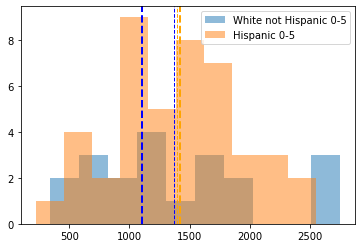

In [61]:
pyplot.hist(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']==' 0 - 5')].Expenditures,alpha=0.5, label='White not Hispanic 0-5')
pyplot.axvline(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']==' 0 - 5')].Expenditures.mean(), color='blue', linestyle='dashed', linewidth=1)
pyplot.axvline(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']==' 0 - 5')].Expenditures.median(), color='blue', linestyle='dashed', linewidth=2)



pyplot.hist(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']==' 0 - 5')].Expenditures,alpha=0.5, label='Hispanic 0-5')
pyplot.axvline(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']==' 0 - 5')].Expenditures.mean(), color='orange', linestyle='dashed', linewidth=1)
pyplot.axvline(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']==' 0 - 5')].Expenditures.median(), color='orange', linestyle='dashed', linewidth=2)



pyplot.legend(loc='upper right')
pyplot.show()

13-17, basically overlapping medians

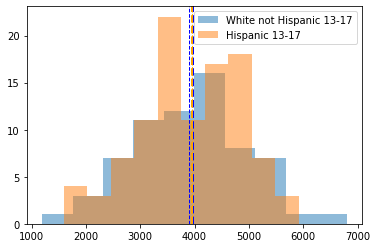

In [59]:
pyplot.hist(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']=='13-17')].Expenditures,alpha=0.5, label='White not Hispanic 13-17')
pyplot.axvline(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']=='13-17')].Expenditures.mean(), color='blue', linestyle='dashed', linewidth=1)
pyplot.axvline(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']=='13-17')].Expenditures.median(), color='blue', linestyle='dashed', linewidth=2)



pyplot.hist(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']=='13-17')].Expenditures,alpha=0.5, label='Hispanic 13-17')
pyplot.axvline(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']=='13-17')].Expenditures.mean(), color='orange', linestyle='dashed', linewidth=1)
pyplot.axvline(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']=='13-17')].Expenditures.median(), color='orange', linestyle='dashed', linewidth=2)



pyplot.legend(loc='upper right')
pyplot.show()

18-21, basically overlapping medians

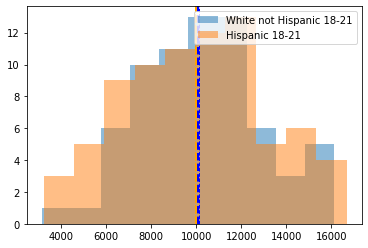

In [60]:
pyplot.hist(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']=='18-21')].Expenditures,alpha=0.5, label='White not Hispanic 18-21')
pyplot.axvline(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']=='18-21')].Expenditures.mean(), color='blue', linestyle='dashed', linewidth=1)
pyplot.axvline(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']=='18-21')].Expenditures.median(), color='blue', linestyle='dashed', linewidth=2)



pyplot.hist(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']=='18-21')].Expenditures,alpha=0.5, label='Hispanic 18-21')
pyplot.axvline(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']=='18-21')].Expenditures.mean(), color='orange', linestyle='dashed', linewidth=1)
pyplot.axvline(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']=='18-21')].Expenditures.median(), color='orange', linestyle='dashed', linewidth=2)



pyplot.legend(loc='upper right')
pyplot.show()

6-12, Hispanics with the lead

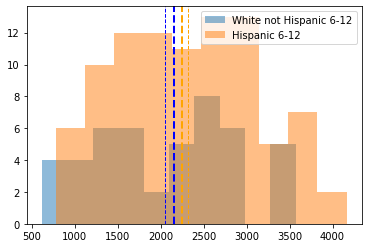

In [92]:
pyplot.hist(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']=='6-12')].Expenditures,alpha=0.5, label='White not Hispanic 6-12')
pyplot.axvline(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']=='6-12')].Expenditures.mean(), color='blue', linestyle='dashed', linewidth=1)
pyplot.axvline(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']=='6-12')].Expenditures.median(), color='blue', linestyle='dashed', linewidth=2)



pyplot.hist(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']=='6-12')].Expenditures,alpha=0.5, label='Hispanic 6-12')
pyplot.axvline(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']=='6-12')].Expenditures.mean(), color='orange', linestyle='dashed', linewidth=1)
pyplot.axvline(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']=='6-12')].Expenditures.median(), color='orange', linestyle='dashed', linewidth=2)



pyplot.legend(loc='upper right')
pyplot.show()

22-50, basically overlapping

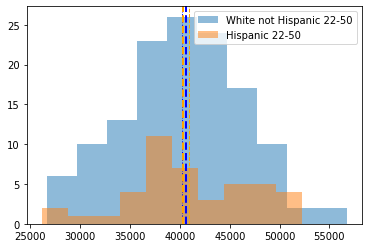

In [63]:
pyplot.hist(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']=='22-50')].Expenditures,alpha=0.5, label='White not Hispanic 22-50')
pyplot.axvline(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']=='22-50')].Expenditures.mean(), color='blue', linestyle='dashed', linewidth=1)
pyplot.axvline(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']=='22-50')].Expenditures.median(), color='blue', linestyle='dashed', linewidth=2)



pyplot.hist(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']=='22-50')].Expenditures,alpha=0.5, label='Hispanic 22-50')
pyplot.axvline(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']=='22-50')].Expenditures.mean(), color='orange', linestyle='dashed', linewidth=1)
pyplot.axvline(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']=='22-50')].Expenditures.median(), color='orange', linestyle='dashed', linewidth=2)



pyplot.legend(loc='upper right')
pyplot.show()

51+, Hispanic median leads

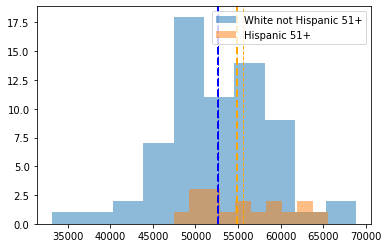

In [68]:
pyplot.hist(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']==' 51 +')].Expenditures,alpha=0.5, label='White not Hispanic 51+')
pyplot.axvline(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']==' 51 +')].Expenditures.mean(), color='blue', linestyle='dashed', linewidth=1)
pyplot.axvline(df[(df['Ethnicity']=='White not Hispanic')&(df['Age_Cohort']==' 51 +')].Expenditures.median(), color='blue', linestyle='dashed', linewidth=2)



pyplot.hist(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']==' 51 +')].Expenditures,alpha=0.5, label='Hispanic 51+')
pyplot.axvline(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']==' 51 +')].Expenditures.mean(), color='orange', linestyle='dashed', linewidth=1)
pyplot.axvline(df[(df['Ethnicity']=='Hispanic')&(df['Age_Cohort']==' 51 +')].Expenditures.median(), color='orange', linestyle='dashed', linewidth=2)



pyplot.legend(loc='upper right')
pyplot.show()

In [145]:
#Simpson's paradox! 